**TUGAS STATISTIK TERAPAN**

**Handling Outliers**

Nama : 

1.   Seprina Dwi Cahyani (G1A021010)
2.   Muhammad Facrurrozi (G1A021018)


Kelas : Informatika B

In [ ]:
# Link : https://www.kaggle.com/datasets/rishabsharmab/bike-buyers
# Data ini berisikan tentang data pembeli sepeda

In [25]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR49WPBvyvBlfNo1wEwE6epoXKrpHfcLhAkI87s3vB2OSctIgkp7pxQhg-IX3LHK_AQmgOlpmZpnebw/pub?gid=382860817&single=true&output=csv')
#menampilkan 5 data teratas
df.head(5)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [34]:
#menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            1000 non-null   float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [42]:
#handling missing values pada kolom Income dan Age menggunakan median
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Age'].fillna(df['Age'].median(), inplace = True)

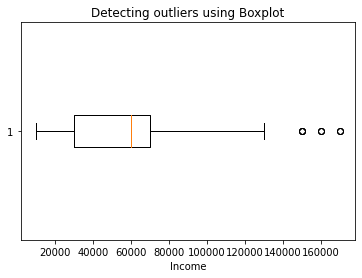

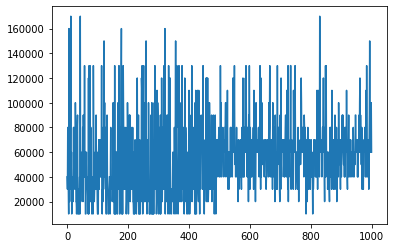

In [33]:
#menampilkan outliers menggunakan boxplot
import matplotlib.pyplot as plt

plt.boxplot(df.Income, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Income')
plt.show()
plt.plot(df.Income)

In [49]:
#handling outliers menggunakan QUANTILE BASED FLOORING AND CAPPING
tenth_percentile = np.percentile(df.Income, 10)
ninetieth_percentile = np.percentile(df.Income, 90)
print(tenth_percentile, ninetieth_percentile) 
a = np.where(df.Income<tenth_percentile, tenth_percentile, df.Income)
a = np.where(a>ninetieth_percentile, ninetieth_percentile, a)

20000.0 100000.0


Text(0.5, 0, 'Income')

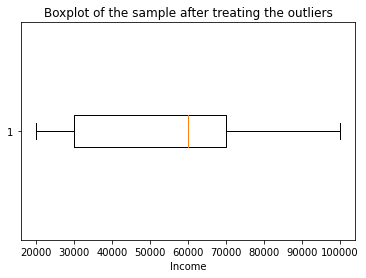

In [37]:
#menampilkan outliers menggunakan boxplot
plt.boxplot(a, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Income")

In [38]:
#korelasi antar kolom
df.corr()

,ID,Income,Children,Cars,Age
ID,1.000000,-0.074858,-0.028747,0.022125,-0.054238
Income,-0.074858,1.000000,0.260644,0.438190,0.170451
Children,-0.028747,0.260644,1.000000,0.280243,0.531668
Cars,0.022125,0.438190,0.280243,1.000000,0.186398
Age,-0.054238,0.170451,0.531668,0.186398,1.000000


In [47]:
#korelasi antar 2 kolom
korelasi = np.corrcoef(df.Income,df.Age)
korelasi

#pada kode diatas menunjukan bivariate analysis correlation yang mana menggunakan variabel Income 
#dan Age yang menunjukan correlation coefficient menjadi 0.17032637 yang mengindikasikan 
#adanya korelasi positif yang lemah antara Income dan Age

array([[1.        , 0.17032637],
       [0.17032637, 1.        ]])

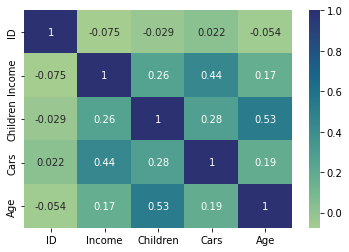

In [48]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), cmap="crest", annot=True)
plt.show()